# Import

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AvgPool2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

---
# Deep/Reinforcement Learning with Convoluted Neural Networks on Covid-19 X-Ray Images


In this project, I shall be performing analysis on covid-19 x-ray images, using three distinct convoluted neural networks.

*   LeNet
*   AlexNet
*   VGG

The dataset is available at; https://www.kaggle.com/khoongweihao/covid19-xray-dataset-train-test-sets which has a total of 188 pictures, split into 40 images for testing ang 148 for training. Let's get started with importing the images and splitting them into there validation and test sets.

We first define the directories which point to the train folder and test folder, then labeling which are the "NORMAL" and "PNEUMONIA" sets.

In [4]:
#point to train/test directories.
train_dir = '/content/drive/MyDrive/xray_dataset_covid19/train'
validation_dir ='/content/drive/MyDrive/xray_dataset_covid19/test'

train_normal_dir = os.path.join(train_dir,'NORMAL')
train_pneumonia_dir = os.path.join(train_dir,'PNEUMONIA')
validation_normal_dir = os.path.join(validation_dir,'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir,'PNEUMONIA')

In [5]:
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_pneumonia_names = os.listdir(train_pneumonia_dir)
print(train_pneumonia_names[:10])

['IM-0005-0001.jpeg', 'IM-0001-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0037-0001.jpeg', 'NORMAL2-IM-0007-0001.jpeg', 'IM-0077-0001.jpeg', 'IM-0097-0001.jpeg', 'IM-0061-0001.jpeg', 'IM-0007-0001.jpeg']
['2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg', '1-s2.0-S1684118220300682-main.pdf-002-a1.png', '41591_2020_819_Fig1_HTML.webp-day10.png', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg', '5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg', '1-s2.0-S1684118220300682-main.pdf-003-b2.png', '171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', '1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg']


Above, we can see a subset of images in each directory for our training sets. This is quite like that of the test set. While below, we can see our train/test split count.

In [6]:
print('total training normal-rays :', len(os.listdir(train_normal_dir)))
print('total training Pneumonia x-rays:', len(os.listdir(train_pneumonia_dir)))
print('total validation normal-rays :', len(os.listdir(validation_normal_dir)))
print('total validation Pneumonia x-rays:', len(os.listdir(validation_pneumonia_dir)))

total training normal-rays : 74
total training Pneumonia x-rays: 74
total validation normal-rays : 20
total validation Pneumonia x-rays: 20


Lastly, we will need to scale our image sets down from their original sizing, and setting up our batch size.

In [7]:
#data generate
train_data_generator = ImageDataGenerator(rescale = 1/255)
validation_data_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_data_generator.flow_from_directory(
        train_dir, target_size = (150,150), batch_size = 16, class_mode = 'binary')

validation_generator = validation_data_generator.flow_from_directory(
        validation_dir, target_size = (150,150), batch_size = 16, class_mode = 'binary')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


---
# Model One - CNN: LeNet

http://d2l.ai/chapter_convolutional-neural-networks/lenet.html

LeNet, among the first published CNNs to capture wide attention for its performance on computer vision tasks. The model was introduced by (and named for) Yann LeCun, then a researcher at AT&T Bell Labs, for the purpose of recognizing handwritten digits in images. This work represented the culmination of a decade of research developing the technology. In 1989, LeCun published the first study to successfully train CNNs via backpropagation.

At the time LeNet achieved outstanding results matching the performance of support vector machines, then a dominant approach in supervised learning. LeNet was eventually adapted to recognize digits for processing deposits in ATM machines. To this day, some ATMs still run the code that Yann and his colleague Leon Bottou wrote in the 1990s!

Below, the LeNet model is established;

In [41]:
#making our LeNet Model
model_leNet = Sequential()

model_leNet.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='sigmoid', input_shape=(150, 150, 3), padding='same'))
model_leNet.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2))
model_leNet.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='sigmoid'))
model_leNet.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2))

model_leNet.add(Flatten())

model_leNet.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model_leNet.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model_leNet.add(tf.keras.layers.Dense(1))

model_leNet.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.1), metrics=['accuracy'])

In [42]:
history1 = model_leNet.fit_generator(generator=train_generator, epochs = 15, validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
10/10 [==============================] - 17s 2s/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 16s 2s/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/15
10/10 [==============================] - 16s 2s/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/15
10/10 [==============================] - 16s 2s/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/15
10/10 [==============================] - 16s 2s/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/15
10/10 [==============================] - 16s 2s/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/15
10/10 [==============================] - 16s 1s/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 8/15
10/10 [==

In [43]:
model_leNet.build()
model_leNet.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
average_pooling2d_8 (Average (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 71, 71, 32)        51232     
_________________________________________________________________
average_pooling2d_9 (Average (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 39200)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               3920100   
_________________________________________________________________
dense_31 (Dense)             (None, 50)              

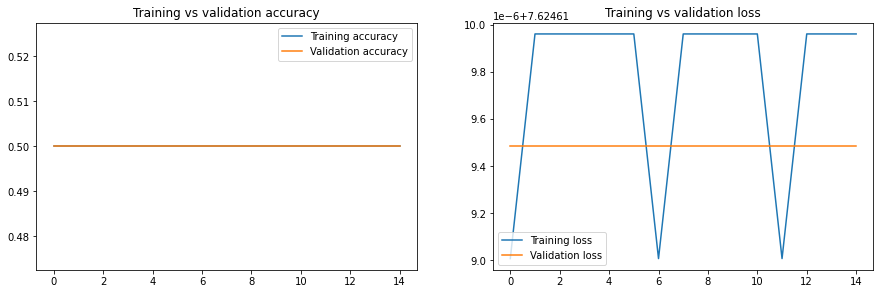

In [44]:
accuracy = history1.history['accuracy']
val_accuracy  = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

---
# Model Two - CNN: AlexNet


http://d2l.ai/chapter_convolutional-modern/alexnet.html?highlight=alexnet

Although LeNet achieved good results on early small datasets, the performance and feasibility of training CNNs on larger, more realistic datasets had yet to be established. AlexNet was named after Alex Krizhevsky, in the lowest layers of the network, the model learned feature extractors that resembled some traditional filters. Higher layers in the network might build upon these representations to represent larger structures, like eyes, noses, blades of grass, and so on. Even higher layers might represent whole objects like people, airplanes, dogs, or frisbees. Ultimately, the final hidden state learns a compact representation of the image that summarizes its contents such that data belonging to different categories can be easily separated.

Below, the AlexNet model is established;

In [52]:
# Making our AlexNet
model_alexNet = Sequential()

# Here, we use a larger 11 x 11 window to capture objects. 
# At the same time, we use a stride of 4 to greatly reduce the height and width of the output.
# Here, the number of output channels is much larger than that in LeNet
model_alexNet.add(tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=(150, 150, 3)))
model_alexNet.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Make the convolution window smaller, set padding to 2 for consistent
# height and width across the input and output, and increase the number of output channels
model_alexNet.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
model_alexNet.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Use three successive convolutional layers and a smaller convolution window.
# Except for the final convolutional layer, the number of output channels is further increased.
# Pooling layers are not used to reduce the height and width of input after the first two convolutional layers.
model_alexNet.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model_alexNet.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model_alexNet.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_alexNet.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_alexNet.add(tf.keras.layers.Flatten())

# Here, the number of outputs of the fully-connected layer is several times larger than that in LeNet.
# Use the dropout layer to mitigate overfitting.
model_alexNet.add(tf.keras.layers.Dense(128, activation='relu'))
model_alexNet.add(tf.keras.layers.Dropout(0.25))
model_alexNet.add(tf.keras.layers.Dense(1, activation='relu'))
model_alexNet.add(tf.keras.layers.Dropout(0.25))

# Output layer. Since we are using Fashion-MNIST, the number of classes is 10, instead of 1000 as in the paper.
model_alexNet.add(tf.keras.layers.Dense(10))

model_alexNet.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.1), metrics=['accuracy'])

In [53]:
history2 = model_alexNet.fit_generator(generator=train_generator, epochs = 15, validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
10/10 [==============================] - 10s 932ms/step - loss: 6.7254 - accuracy: 0.0338 - val_loss: 7.6773 - val_accuracy: 0.0000e+00
Epoch 2/15
10/10 [==============================] - 9s 930ms/step - loss: 7.1589 - accuracy: 0.0000e+00 - val_loss: 7.6773 - val_accuracy: 0.0000e+00
Epoch 3/15
10/10 [==============================] - 9s 830ms/step - loss: 6.9314 - accuracy: 0.0000e+00 - val_loss: 7.6773 - val_accuracy: 0.0000e+00
Epoch 4/15
10/10 [==============================] - 9s 833ms/step - loss: 6.8747 - accuracy: 0.0000e+00 - val_loss: 7.6773 - val_accuracy: 0.0000e+00
Epoch 5/15
10/10 [==============================] - 9s 830ms/step - loss: 6.8083 - accuracy: 0.0000e+00 - val_loss: 7.6773 - val_accuracy: 0.0000e+00
Epoch 6/15
10/10 [==============================] - 9s 809ms/step - loss: 7.0813 - accuracy: 0.0000e+00 - val_loss: 7.6773 - val_accuracy: 0.0000e+00
Epoch 7/15
10/10 [==============================] - 9s 850ms/step - loss: 6.8841 - accuracy: 0.0000e+00

In [54]:
model_alexNet.build()
model_alexNet.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 35, 35, 96)        34944     
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 17, 17, 96)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 17, 17, 64)        153664    
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 8, 8, 64)        

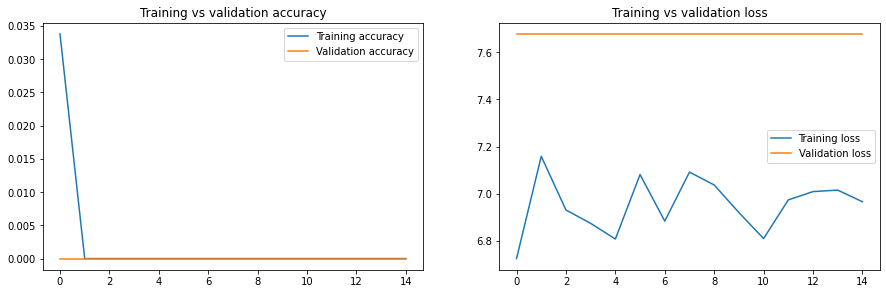

In [55]:
accuracy = history2.history['accuracy']
val_accuracy  = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

---
# Model Three - CNN: VGG


http://d2l.ai/chapter_convolutional-modern/vgg.html?highlight=vgg

While AlexNet offered empirical evidence that deep CNNs can achieve good results, it did not provide a general template to guide subsequent researchers in designing new networks. The idea of using blocks first emerged from the Visual Geometry Group (VGG) at Oxford University, in their eponymously-named VGG network. It is easy to implement these repeated structures in code with any modern deep learning framework by using loops and subroutines.

Below, the VGG model is established;

In [56]:
# Making our VGG

num_convs = 11
num_channels = 20

model_VGG = Sequential()

#first layer
model_VGG.add(tf.keras.layers.Conv2D(num_channels, kernel_size=3, padding='same', activation='relu', input_shape=(150, 150, 3)))
model_VGG.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# The convulational part
for _ in range(num_convs):
  model_VGG.add(tf.keras.layers.Conv2D(num_channels, kernel_size=3, padding='same', activation='relu'))
  model_VGG.add(tf.keras.layers.MaxPool2D(pool_size=1, strides=2))

# The fully-connected part
model_VGG.add(tf.keras.layers.Flatten())
model_VGG.add(tf.keras.layers.Dense(32, activation='relu'))
model_VGG.add(tf.keras.layers.Dropout(0.1))
model_VGG.add(tf.keras.layers.Dense(32, activation='relu'))
model_VGG.add(tf.keras.layers.Dropout(0.1))
model_VGG.add(tf.keras.layers.Dense(1))

model_VGG.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.1), metrics=['accuracy'])

In [57]:
history3 = model_VGG.fit_generator(generator=train_generator, epochs = 15, validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
10/10 [==============================] - 12s 985ms/step - loss: 7.8010 - accuracy: 0.4865 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 9s 914ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/15
10/10 [==============================] - 9s 983ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/15
10/10 [==============================] - 9s 922ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/15
10/10 [==============================] - 9s 897ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/15
10/10 [==============================] - 9s 896ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/15
10/10 [==============================] - 9s 909ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch

In [58]:
model_VGG.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 150, 150, 20)      560       
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 75, 75, 20)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 75, 75, 20)        3620      
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 38, 38, 20)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 38, 38, 20)        3620      
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 19, 19, 20)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 19, 19, 20)      

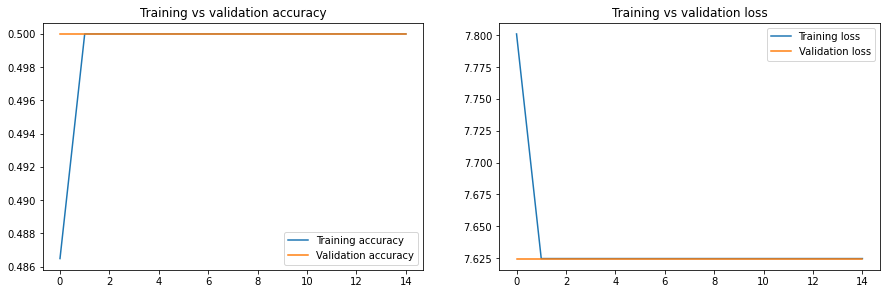

In [59]:
accuracy = history3.history['accuracy']
val_accuracy  = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

---
# Summery

With all models, the validation accuracy has been capped to 0.5, with high loss values under validation. With the exception of AlexNet which actually reduced in accuracy from the first epoch and never increased through the proceeding cycles.

This to me indicates a potential of overly complex models for the problem at hand. I feel that non of the above models fit the problem, and this can be proven with the model below. 

In [24]:
model_sum = Sequential()

model_sum.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model_sum.add(tf.keras.layers.MaxPooling2D(2, 2))
model_sum.add(tf.keras.layers.Dropout(0.25))
model_sum.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model_sum.add(tf.keras.layers.MaxPooling2D(2,2))
model_sum.add(tf.keras.layers.Dropout(0.25))
model_sum.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model_sum.add(tf.keras.layers.MaxPooling2D(2,2))
model_sum.add(tf.keras.layers.Dropout(0.25))
model_sum.add(tf.keras.layers.Flatten())
model_sum.add(tf.keras.layers.Dense(512, activation='relu'))
model_sum.add(tf.keras.layers.Dropout(0.25))
model_sum.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_sum.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [26]:
history_sum = model_sum.fit_generator(generator=train_generator, epochs = 15, validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
10/10 [==============================] - 14s 1s/step - loss: 1.9109 - accuracy: 0.5068 - val_loss: 0.6404 - val_accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 13s 1s/step - loss: 0.6568 - accuracy: 0.6351 - val_loss: 0.5368 - val_accuracy: 0.9500
Epoch 3/15
10/10 [==============================] - 13s 1s/step - loss: 0.5125 - accuracy: 0.7635 - val_loss: 0.3966 - val_accuracy: 0.9750
Epoch 4/15
10/10 [==============================] - 13s 1s/step - loss: 0.4322 - accuracy: 0.8041 - val_loss: 0.7186 - val_accuracy: 0.5250
Epoch 5/15
10/10 [==============================] - 13s 1s/step - loss: 0.5569 - accuracy: 0.7230 - val_loss: 0.2942 - val_accuracy: 1.0000
Epoch 6/15
10/10 [==============================] - 13s 1s/step - loss: 0.2558 - accuracy: 0.8986 - val_loss: 0.2310 - val_accuracy: 0.9250
Epoch 7/15
10/10 [==============================] - 13s 1s/step - loss: 0.3508 - accuracy: 0.8581 - val_loss: 0.2875 - val_accuracy: 0.9750
Epoch 8/15
10/10 [==

In [60]:
model_sum.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 16)       

Already we can see high acuracy scores with low valdiation losses. This is what I was expecting from the above three models. Though, I think there is scope of improvement regarding these two models could be adpated, given more time, thorough exploration of the appropraite variables of the models could help yeild an understanding of whats optimal and whats not. Though, fundamentally, less complex models are the way forward for this issue.

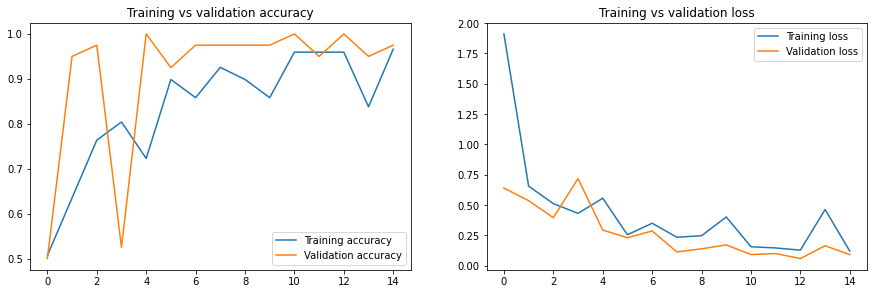

In [27]:
accuracy = history_sum.history['accuracy']
val_accuracy  = history_sum.history['val_accuracy']

loss = history_sum.history['loss']
val_loss = history_sum.history['val_loss']
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()